In [1]:
# rename everything in fw and iv

In [2]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated
from helper_functions.invertible_neural_network import InvertibleNetworkSurrogate


In [3]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

# Config

In [4]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory

'/data/user/boiger_r/aerosol'

In [5]:
test_datafile = directory +'/aerosol_data/raw_data/pre_log_ts-0.2_P11_wl-532/test_dataset.hdf5'

In [6]:
model_name = 'invertible_model'
val_model_name = 'forward_model'

In [7]:
model_dir = directory +'/aerosol_results/simulated_data/models/models3'

In [8]:
plot_dir = directory +'/aerosol_results/simulated_data/invertible_model3/plots/model'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Load the model and the data

In [9]:
custom_objects = {
    'AdjustedRSquared': AdjustedRSquared,
}

kwargs = {
    'custom_objects': custom_objects,
    'compile': False,
}

surr = InvertibleNetworkSurrogate.load(model_dir, model_name, model_kwargs=kwargs)
#import tensorflow as tf
#tf.keras.backend.set_floatx('float32')
#surr = KerasSurrogate.load(model_dir, model_name)

#val_surr = KerasSurrogate.load(model_dir, val_model_name, model_kwargs=kwargs)

In [10]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')

In [11]:
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [12]:
qoi_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.346368   -15.647405   -15.970624   -16.311292   -16.653436   
1       -16.014276   -16.163742   -16.331920   -16.516203   -16.713155   
2       -15.012475   -15.523168   -16.036147   -16.531054   -16.993892   
3       -15.110576   -15.127886   -15.148264   -15.171547   -15.197773   
4       -15.174501   -15.305256   -15.452063   -15.612544   -15.783912   
...            ...          ...          ...          ...          ...   
19995   -14.684202   -15.030477   -15.398550   -15.783268   -16.160502   
19996   -15.173373   -15.617139   -16.067307   -16.508342   -16.909186   
19997   -15.379258   -15.411835   -15.449856   -15.493067   -15.541145   
19998   -14.784675   -15.078137   -15.392046   -15.719185   -16.045682   
19999   -15.515366   -16.027250   -16.539644   -17.031266   -17.492659   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -16.991183    -17.330672    -17.640897    -17.953306    -18.235696   
1        -16.921192    -17.137610    -17.357178    -17.592391    -17.812220   
2        -17.371364    -17.737432    -18.033515    -18.265816    -18.461357   
3        -15.226795    -15.258587    -15.293043    -15.331595    -15.369561   
4        -15.964517    -16.152045    -16.342427    -16.546712    -16.736172   
...             ...           ...           ...           ...           ...   
19995    -16.518349    -16.876763    -17.199644    -17.509242    -17.786276   
19996    -17.247239    -17.559565    -17.813364    -17.990783    -18.156242   
19997    -15.593900    -15.650971    -15.712164    -15.780053    -15.845553   
19998    -16.366749    -16.678024    -16.959743    -17.213962    -17.454191   
19999    -17.866221    -18.232874    -18.537709    -18.784121    -18.989895   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
0      ...     -23.110124     -23.113011     -23.136928     -23.184647   
1      ...     -23.459839     -23.464077     -23.464821     -23.461755   
2      ...     -22.957258     -22.957445     -22.957538     -22.957538   
3      ...     -20.417253     -20.405321     -20.393602     -20.382090   
4      ...     -22.732734     -22.771907     -22.809611     -22.843529   
...    ...            ...            ...            ...            ...   
19995  ...     -22.322357     -22.292618     -22.286154     -22.309134   
19996  ...     -21.075977     -21.043402     -21.021699     -20.992087   
19997  ...     -21.247042     -21.256490     -21.263280     -21.266821   
19998  ...     -20.218619     -20.143847     -20.075221     -20.011886   
19999  ...     -24.145942     -24.140501     -24.139252     -24.143340   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
0         -23.255981     -23.346580     -23.446105     -23.537277   
1         -23.454866     -23.444477     -23.431206     -23.415891   
2         -22.957445     -22.957258     -22.956978     -22.956511   
3         -20.370920     -20.360152     -20.350048     -20.340592   
4         -22.871158     -22.890708     -22.901070     -22.902218   
...              ...            ...            ...            ...   
19995     -22.364401     -22.451150     -22.561802     -22.678580   
19996     -20.964141     -20.961168     -20.984072     -21.050160   
19997     -21.266735     -21.262851     -21.255332     -21.244681   
19998     -19.957240     -19.912869     -19.875939     -19.841442   
19999     -24.152955     -24.167193     -24.183767     -24.199392   

       P11_0.532_174  P11_0.532_175  
0         -23.598782     -23.614260  
1         -23.399570     -23.383355  
2         -22.956045     -22.955392  
3         -20.332035     -20.324423  
4         -22.895437     -22.882877  
...              ...            ...  
19995     -22.772372     -22.811788  
19996     -21.163198     -21.307003  
19997     -21.231761     -21.217743  
19998     -19.800357     -19.743550  
19999     -24.210446     -24.2143

In [13]:
qoi_columns = qoi_test.columns

dvar = pd.read_hdf(datafile, key='dvar')
qoi = pd.read_hdf(datafile, key='qoi')
qoi_columns = qoi.columns

n_in = dvar.shape[1]

dvar_trainval, dvar_test, qoi_trainval, qoi_test = train_test_split(dvar,
                                                                    qoi,
                                                                    test_size=0.2)
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

dvar_trainval.reset_index(drop=True, inplace=True)
qoi_trainval.reset_index(drop=True, inplace=True)

kf = KFold(n_splits=5, random_state=76, shuffle=True)

train_ind, val_ind = next(kf.split(dvar_trainval))

dvar_train = dvar_trainval.values[train_ind]
dvar_val = dvar_trainval.values[val_ind]
qoi_train = qoi_trainval.values[train_ind]
qoi_val = qoi_trainval.values[val_ind]

In [14]:
qoi_test_plot = qoi_test.copy()

# Forward Prediction

## Predict

In [15]:
dvar_test

n_532nm   k_532nm        V_tot  R_median       GSD
0      1.345160  0.060143  2315.678911  1.360143  1.422027
1      1.560918  0.172217  1121.450456  0.871451  1.422156
2      1.556752  0.179643  4962.553150  2.033473  1.405489
3      1.331706  0.039514  4874.291655  0.258148  1.404925
4      1.436442  0.118185  2536.972303  0.806500  1.444872
...         ...       ...          ...       ...       ...
19995  1.333477  0.047427  4764.529527  1.494872  1.414259
19996  1.468337  0.012928  3534.192530  1.835515  1.405211
19997  1.390257  0.042194  2015.697397  0.385029  1.430910
19998  1.563611  0.013500  3989.475902  1.355483  1.409619
19999  1.338385  0.098061  3102.600374  2.073354  1.426555

[20000 rows x 5 columns]

In [16]:
len(dvar_test)

20000

In [17]:
import time

In [18]:
start = time.time()
qoi_pred_fw = surr.predict(dvar_test.values)
end = time.time()



In [19]:
time = (end-start)/len(dvar_test)
time

0.00015003504753112793

In [20]:
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.426018   -15.721996   -15.965679   -16.302468   -16.728361   
1       -16.123273   -16.137178   -16.311120   -16.573247   -16.657462   
2       -14.973116   -15.473975   -16.006552   -16.480211   -16.827592   
3       -14.875734   -15.091297   -15.006718   -15.029213   -15.096809   
4       -15.104395   -15.138520   -15.312157   -15.633336   -15.651355   
...            ...          ...          ...          ...          ...   
19995   -14.768168   -15.144960   -15.413385   -15.782827   -16.240140   
19996   -15.351563   -15.786531   -16.158319   -16.659583   -17.001023   
19997   -15.442954   -15.479552   -15.548166   -15.548879   -15.633646   
19998   -15.049454   -15.298638   -15.537710   -15.964442   -16.341674   
19999   -15.574352   -16.070023   -16.562368   -17.078117   -17.571608   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -17.004058    -17.279064    -17.592868    -17.905415    -18.168306   
1        -16.904003    -17.111578    -17.340665    -17.638286    -17.904599   
2        -17.100571    -17.451140    -17.804049    -18.037631    -18.330470   
3        -15.072544    -15.036464    -15.050067    -15.191084    -15.121907   
4        -15.787908    -16.044701    -16.241319    -16.532557    -16.736901   
...             ...           ...           ...           ...           ...   
19995    -16.519410    -16.838613    -17.124163    -17.503719    -17.678453   
19996    -17.243656    -17.584112    -17.812907    -17.955178    -18.184854   
19997    -15.670209    -15.706892    -15.747247    -15.777873    -15.806964   
19998    -16.543609    -16.790188    -17.048401    -17.260836    -17.559662   
19999    -17.810619    -18.238341    -18.544160    -18.720554    -19.067129   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
0      ...     -22.957311     -23.125089     -23.140753     -23.446432   
1      ...     -23.620327     -23.512811     -23.572850     -23.388885   
2      ...     -23.130587     -22.902598     -23.124023     -23.016770   
3      ...     -20.369003     -20.416525     -20.423479     -20.938635   
4      ...     -22.658643     -22.680286     -22.751497     -22.730693   
...    ...            ...            ...            ...            ...   
19995  ...     -22.186510     -22.278498     -22.328587     -22.600674   
19996  ...     -20.781673     -20.975493     -20.823783     -20.903663   
19997  ...     -21.172171     -21.208547     -21.251848     -21.354957   
19998  ...     -20.052688     -20.276531     -19.922382     -19.905001   
19999  ...     -23.860168     -24.099682     -24.067049     -24.437615   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
0         -23.199746     -23.243930     -23.538592     -23.338172   
1         -23.562333     -23.649319     -23.678869     -23.504650   
2         -23.239762     -22.948044     -22.882943     -22.957433   
3         -20.506258     -20.591138     -20.542592     -20.364844   
4         -22.944575     -23.033337     -22.726014     -22.858710   
...              ...            ...            ...            ...   
19995     -22.508861     -22.560761     -22.514223     -22.458290   
19996     -20.752530     -20.780092     -20.745462     -20.703117   
19997     -21.172539     -21.368176     -21.255476     -21.256654   
19998     -20.069977     -19.930218     -19.666511     -19.776358   
19999     -24.196438     -24.332840     -24.270424     -24.222941   

       P11_0.532_174  P11_0.532_175  
0         -23.534343     -23.461643  
1         -23.228839     -23.350257  
2         -22.891851     -22.808319  
3         -20.508068     -20.313089  
4         -23.095522     -22.841244  
...              ...            ...  
19995     -22.570440     -22.555908  
19996     -20.984600     -20.926712  
19997     -21.338597     -21.292320  
19998     -19.858255     -19.695088  
19999     -24.260963     -24.3289

In [21]:
qoi_pred_plot_fw = qoi_pred_fw.copy()
qoi_pred_plot_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.426018   -15.721996   -15.965679   -16.302468   -16.728361   
1       -16.123273   -16.137178   -16.311120   -16.573247   -16.657462   
2       -14.973116   -15.473975   -16.006552   -16.480211   -16.827592   
3       -14.875734   -15.091297   -15.006718   -15.029213   -15.096809   
4       -15.104395   -15.138520   -15.312157   -15.633336   -15.651355   
...            ...          ...          ...          ...          ...   
19995   -14.768168   -15.144960   -15.413385   -15.782827   -16.240140   
19996   -15.351563   -15.786531   -16.158319   -16.659583   -17.001023   
19997   -15.442954   -15.479552   -15.548166   -15.548879   -15.633646   
19998   -15.049454   -15.298638   -15.537710   -15.964442   -16.341674   
19999   -15.574352   -16.070023   -16.562368   -17.078117   -17.571608   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -17.004058    -17.279064    -17.592868    -17.905415    -18.168306   
1        -16.904003    -17.111578    -17.340665    -17.638286    -17.904599   
2        -17.100571    -17.451140    -17.804049    -18.037631    -18.330470   
3        -15.072544    -15.036464    -15.050067    -15.191084    -15.121907   
4        -15.787908    -16.044701    -16.241319    -16.532557    -16.736901   
...             ...           ...           ...           ...           ...   
19995    -16.519410    -16.838613    -17.124163    -17.503719    -17.678453   
19996    -17.243656    -17.584112    -17.812907    -17.955178    -18.184854   
19997    -15.670209    -15.706892    -15.747247    -15.777873    -15.806964   
19998    -16.543609    -16.790188    -17.048401    -17.260836    -17.559662   
19999    -17.810619    -18.238341    -18.544160    -18.720554    -19.067129   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
0      ...     -22.957311     -23.125089     -23.140753     -23.446432   
1      ...     -23.620327     -23.512811     -23.572850     -23.388885   
2      ...     -23.130587     -22.902598     -23.124023     -23.016770   
3      ...     -20.369003     -20.416525     -20.423479     -20.938635   
4      ...     -22.658643     -22.680286     -22.751497     -22.730693   
...    ...            ...            ...            ...            ...   
19995  ...     -22.186510     -22.278498     -22.328587     -22.600674   
19996  ...     -20.781673     -20.975493     -20.823783     -20.903663   
19997  ...     -21.172171     -21.208547     -21.251848     -21.354957   
19998  ...     -20.052688     -20.276531     -19.922382     -19.905001   
19999  ...     -23.860168     -24.099682     -24.067049     -24.437615   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
0         -23.199746     -23.243930     -23.538592     -23.338172   
1         -23.562333     -23.649319     -23.678869     -23.504650   
2         -23.239762     -22.948044     -22.882943     -22.957433   
3         -20.506258     -20.591138     -20.542592     -20.364844   
4         -22.944575     -23.033337     -22.726014     -22.858710   
...              ...            ...            ...            ...   
19995     -22.508861     -22.560761     -22.514223     -22.458290   
19996     -20.752530     -20.780092     -20.745462     -20.703117   
19997     -21.172539     -21.368176     -21.255476     -21.256654   
19998     -20.069977     -19.930218     -19.666511     -19.776358   
19999     -24.196438     -24.332840     -24.270424     -24.222941   

       P11_0.532_174  P11_0.532_175  
0         -23.534343     -23.461643  
1         -23.228839     -23.350257  
2         -22.891851     -22.808319  
3         -20.508068     -20.313089  
4         -23.095522     -22.841244  
...              ...            ...  
19995     -22.570440     -22.555908  
19996     -20.984600     -20.926712  
19997     -21.338597     -21.292320  
19998     -19.858255     -19.695088  
19999     -24.260963     -24.3289

## Calculate metrics

In [22]:
metric_fw = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

r2_adj_fw = metric_fw.call(qoi_test_plot.values, qoi_pred_plot_fw.values).numpy()
r2_adj_fw = pd.Series(data=r2_adj_fw, index=qoi_test_plot.columns)
r2_adj_fw = np.round(r2_adj_fw, decimals=2)
r2_adj_fw = pd.DataFrame(r2_adj_fw).T

In [23]:
min(r2_adj_fw.min())

0.97

In [24]:
max(r2_adj_fw.min())

0.99

In [25]:
r2_adj_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.97         0.98         0.98         0.98         0.99   

   P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  ...  \
0          0.99          0.99          0.99          0.99          0.99  ...   

   P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  P11_0.532_170  \
0           0.99           0.99           0.99           0.98           0.99   

   P11_0.532_171  P11_0.532_172  P11_0.532_173  P11_0.532_174  P11_0.532_175  
0           0.99           0.98           0.98           0.98           0.98  

[1 rows x 160 columns]

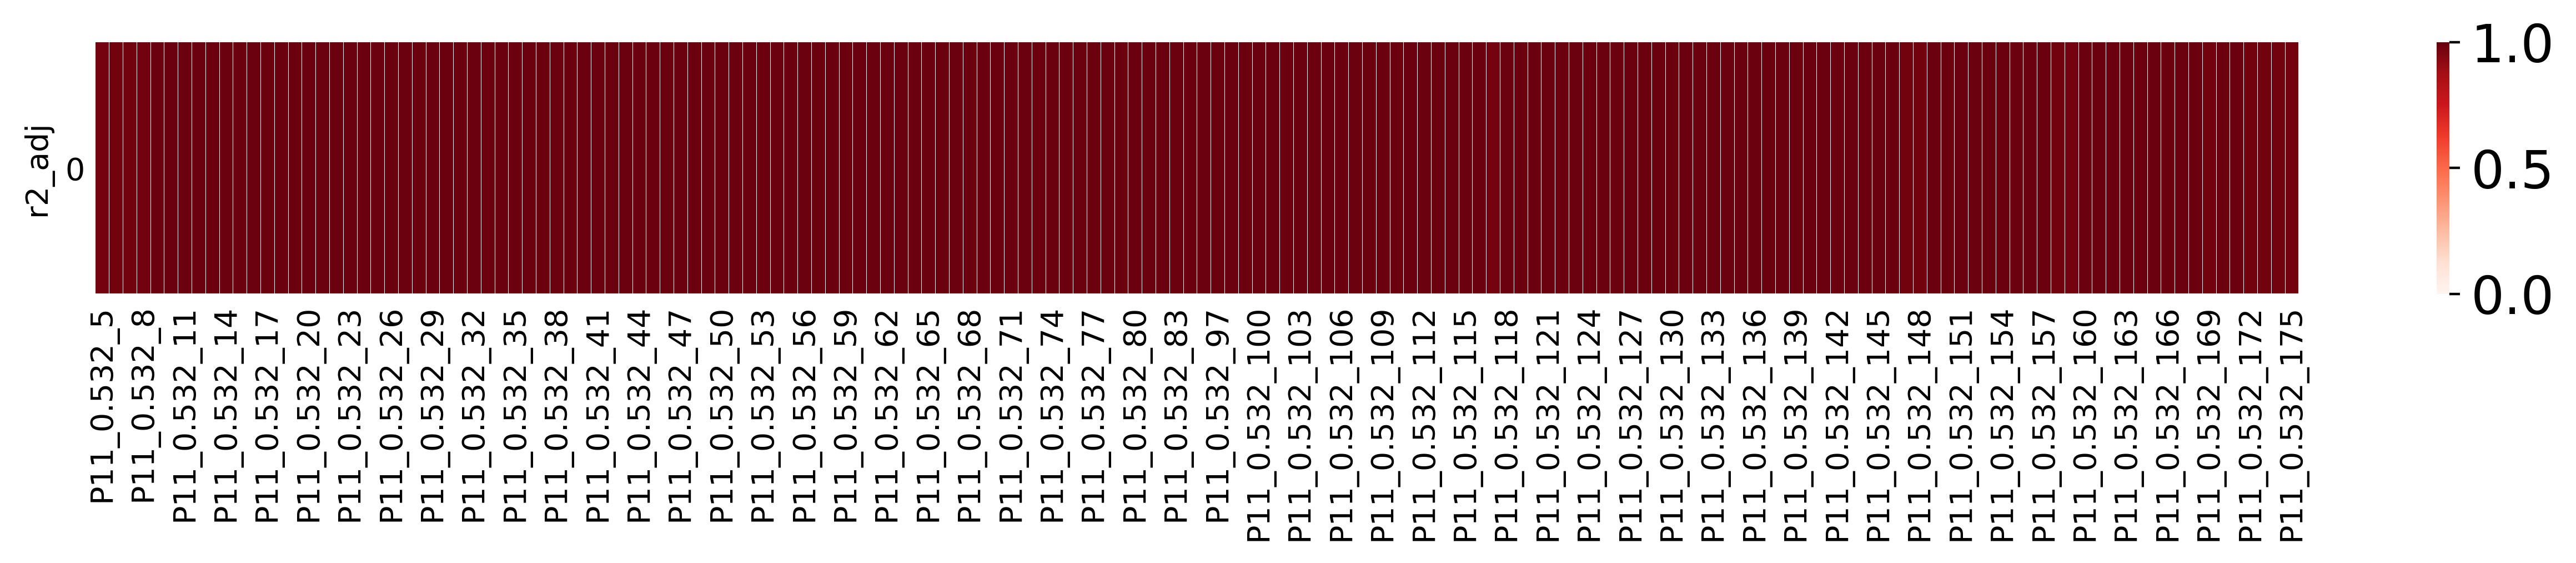

In [26]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_fw,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
ax.set_ylabel('r2_adj')
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_model_fw_r2_adj.jpg')


In [27]:
error_fw = qoi_pred_plot_fw - qoi_test_plot

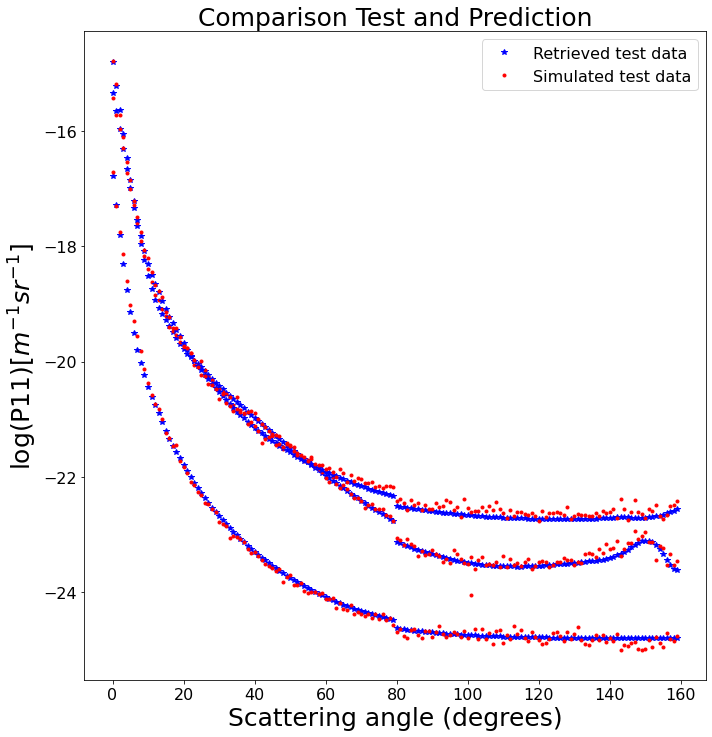

In [28]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]
#presentation_plot_index =[10,11,12,13,14,15,16]
#presentation_plot_index =[40,41,42,43,44,45,46,47,48,49,50]
#presentation_plot_index = [70,18,30,46,59,65]
presentation_plot_index = [0,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(qoi_test_plot.columns)),qoi_test_plot.iloc[index],'b*')
    ax.plot(np.arange(0,len(qoi_pred_plot_fw.columns)),qoi_pred_plot_fw.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('log(P11)[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Retrieved test data', 'Simulated test data'], fontsize = 16)
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

In [29]:
#for col in qoi_pred_plot.columns:
#    plt.figure()
#    plt.plot(qoi_pred_plot[col], qoi_test_plot[col],'*')

In [30]:
rel_error_fw = (qoi_pred_plot_fw - qoi_test_plot) / qoi_test_plot * 100.
rel_error_fw = pd.DataFrame(rel_error_fw, columns=qoi_test_plot.columns).abs()

In [31]:
rel_error_table_fw = np.round(rel_error_fw.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)

In [32]:
rel_error_table_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
50%         0.37         0.35         0.35         0.38         0.34   
75%         0.65         0.62         0.62         0.66         0.61   
90%         0.99         0.96         0.95         0.97         0.94   
95%         1.31         1.23         1.26         1.21         1.17   
99%         3.40         2.70         2.91         2.73         2.51   

     P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
50%          0.34          0.33          0.35          0.38          0.34   
75%          0.60          0.59          0.62          0.66          0.62   
90%          0.93          0.90          0.93          0.97          0.99   
95%          1.23          1.14          1.19          1.20          1.32   
99%          2.73          2.40          2.46          2.11          2.54   

     ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
50%  ...           0.41           0.39           0.39           0.59   
75%  ...           0.73           0.69           0.69           1.03   
90%  ...           1.12           1.06           1.07           1.50   
95%  ...           1.45           1.38           1.40           1.91   
99%  ...           2.54           2.57           2.53           3.42   

     P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
50%           0.42           0.47           0.47           0.54   
75%           0.76           0.84           0.85           0.98   
90%           1.16           1.28           1.32           1.54   
95%           1.45           1.61           1.72           1.95   
99%           2.54           2.67           3.06           2.93   

     P11_0.532_174  P11_0.532_175  
50%           0.54           0.56  
75%           1.03           1.01  
90%           1.64           1.60  
95%           2.08           2.07  
99%           3.03           3.35  

[5 rows x 160 columns]

In [33]:
rel_error_table_fw.max(axis = 1)

50%    0.86
75%    1.37
90%    1.87
95%    2.37
99%    3.83
dtype: float64

## Save $\bar{R}^2$

In [34]:
#r2_adj.to_latex(f'{plot_dir}/forward_pred_r2_table.tex', index=False, escape=False)

## Plot

### Relative Errors

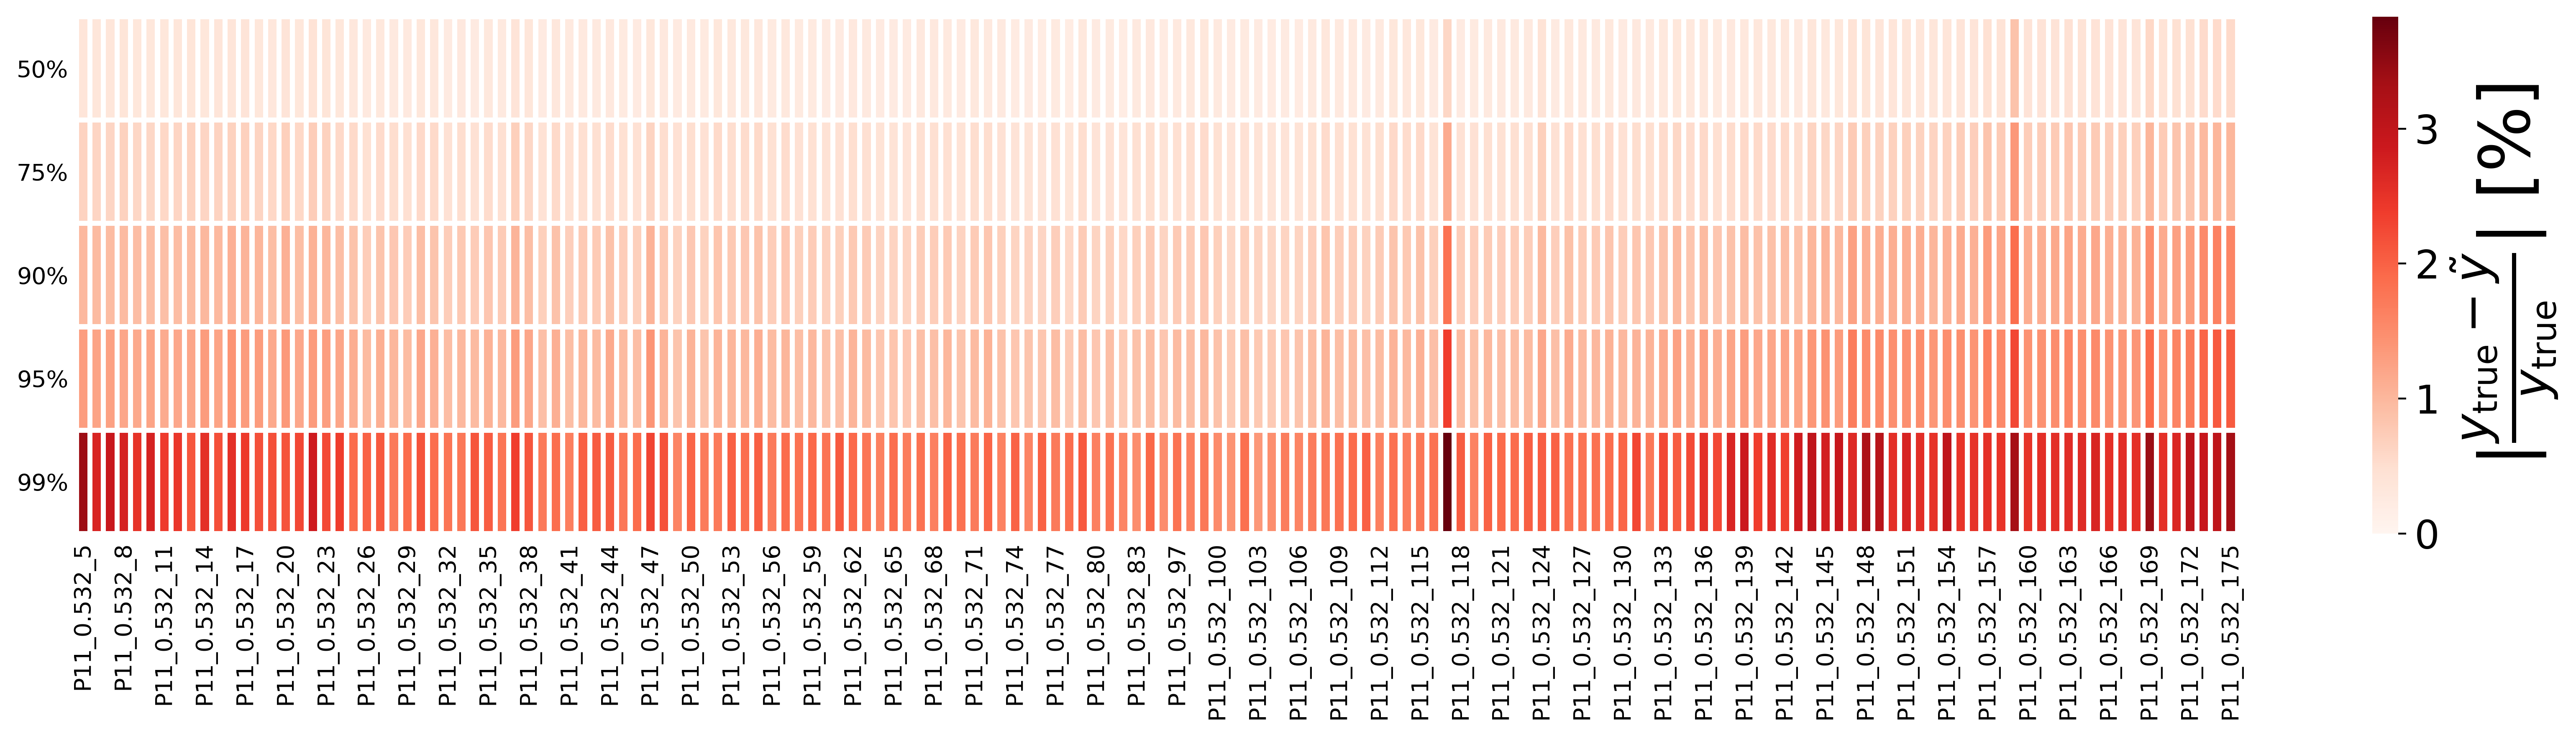

In [35]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_fw,
            cmap='Reds',
           # annot=True,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
           # annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/forward_rel_error_percentiles.jpg')

### DVARs vs. percentage errors

In [36]:
def plot_error_vs_dvar(design_var):
    fig, axes = plt.subplots(4, 3, figsize=(16, 27))


    for i, col in enumerate(qoi_test_plot.columns[0:12]):
        ax = axes.flatten()[i]

        ax.plot(dvar_test[design_var],
                rel_error_fw[col],
                'o');

        ax.hlines(y=0.,
                  xmin=dvar_test[design_var].min(),
                  xmax=dvar_test[design_var].max(),
                  color='red',
                  zorder=3)

        ax.set_xlabel(design_var, fontsize=20)
        ax.set_ylabel(r'$\Delta$' + col + r' [%]', fontsize=20)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/forward_percentage_error_vs_{design_var}.jpg')
    
    return fig

In [37]:
#for d in dvar.columns:
#    plot_error_vs_dvar(d)

### Correlations between DVARs and QOIs

In [38]:
combined_fw = pd.concat([dvar_test, rel_error_fw], axis=1)

In [39]:
corr_fw = np.round(combined_fw.corr(), decimals=2)

In [40]:
to_plot_fw = corr_fw.copy()
to_plot_fw.drop(columns=dvar_test.columns, inplace=True)
to_plot_fw.drop(index= qoi_test.columns,inplace=True)

In [41]:
to_plot_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
n_532nm         -0.04         0.01        -0.05         0.00        -0.02   
k_532nm          0.01        -0.07        -0.08        -0.08        -0.11   
V_tot           -0.19        -0.22        -0.21        -0.12        -0.16   
R_median        -0.15        -0.08        -0.09        -0.12        -0.12   
GSD              0.02         0.01         0.01         0.00         0.01   

          P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  \
n_532nm          -0.02         -0.02         -0.02         -0.06   
k_532nm          -0.02         -0.03         -0.03         -0.00   
V_tot            -0.17         -0.16         -0.14         -0.15   
R_median         -0.16         -0.10         -0.06         -0.05   
GSD               0.01         -0.01         -0.01         -0.01   

          P11_0.532_14  ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  \
n_532nm          -0.05  ...          -0.01          -0.02           0.01   
k_532nm          -0.12  ...          -0.11          -0.10          -0.09   
V_tot            -0.14  ...          -0.15          -0.10          -0.11   
R_median         -0.10  ...          -0.01          -0.11          -0.09   
GSD              -0.00  ...          -0.01           0.01          -0.00   

          P11_0.532_169  P11_0.532_170  P11_0.532_171  P11_0.532_172  \
n_532nm           -0.09           0.08           0.07           0.00   
k_532nm            0.02           0.02          -0.07          -0.08   
V_tot             -0.06          -0.12          -0.09          -0.14   
R_median          -0.03          -0.12          -0.20          -0.17   
GSD               -0.00          -0.01           0.02          -0.01   

          P11_0.532_173  P11_0.532_174  P11_0.532_175  
n_532nm           -0.01           0.03          -0.04  
k_532nm           -0.21          -0.19          -0.24  
V_tot             -0.13          -0.08          -0.09  
R_median          -0.17          -0.29          -0.14  
GSD               -0.00           0.02          -0.00  

[5 rows x 160 columns]

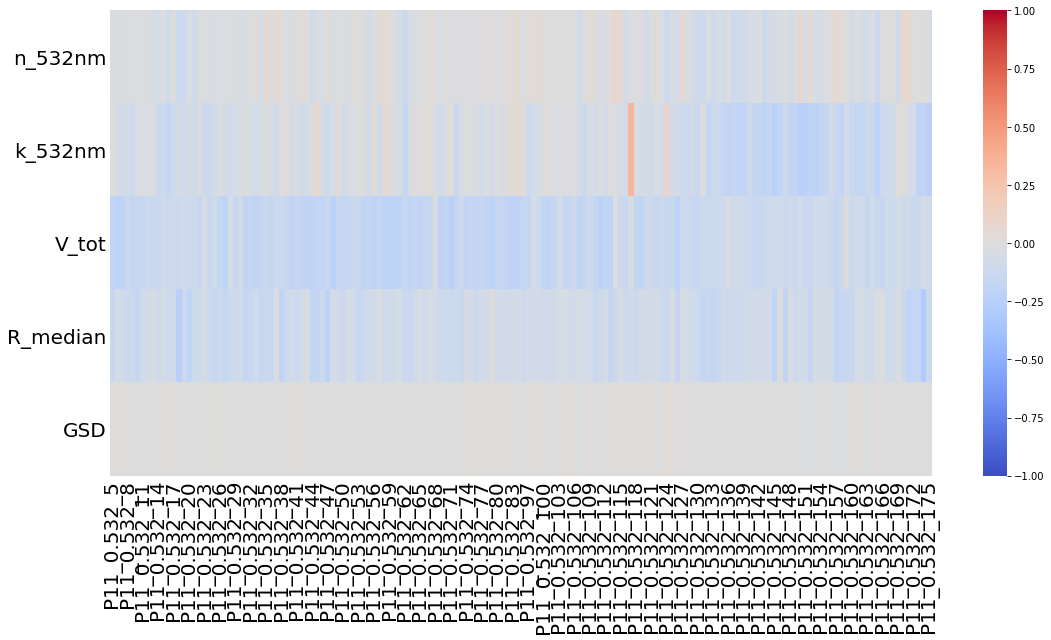

In [42]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(to_plot_fw,
            vmin=-1.,
            vmax=1.,
            cmap='coolwarm',
      #      annot=True,
            ax=ax)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='both', length=0, labelsize=20)

fig.tight_layout()
fig.savefig(f'{plot_dir}/forward_rel_error_correlations.jpg')

In [43]:
qoi_columns[0:3]

Index(['P11_0.532_5', 'P11_0.532_6', 'P11_0.532_7'], dtype='object')

### Residuals

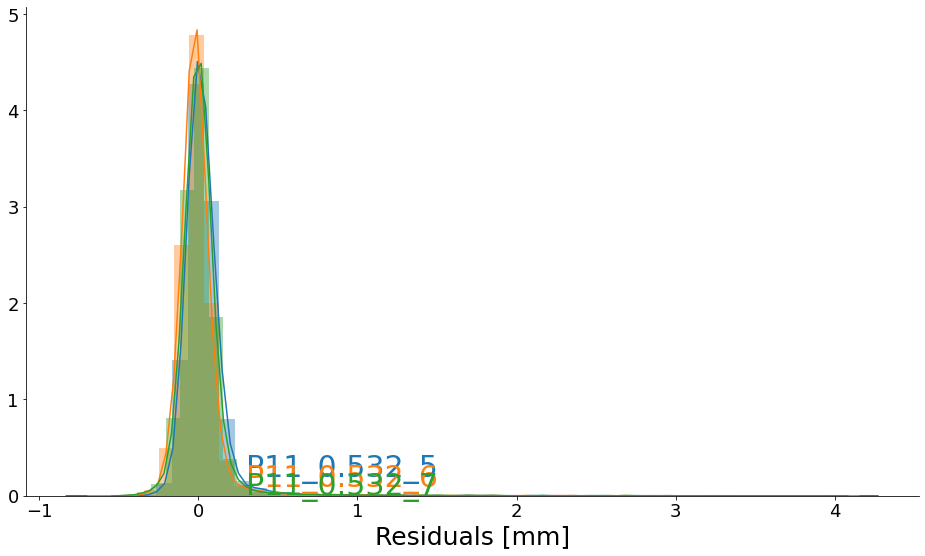

In [44]:
colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))

for col in qoi_columns[0:3]:
    sns.distplot(error_fw[col], ax=ax)

ax.text(x=0.3,
        y=0.2,
        color=colors[0],
        s=qoi_columns[0],
        fontsize=30)
ax.text(x=0.3,
        y=0.1,
        color=colors[1],
        s=qoi_columns[1],
        fontsize=30)
ax.text(x=0.3,
        y=0.02,
        color=colors[2],
        s=qoi_columns[2],
        fontsize=30)

ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/forward_residual_distr_sigma.jpg')

colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))
for col in qoi.columns:
    sns.distplot(error_fw[col], ax=ax)
'''ax.text(x=-0.025,
        y=1.55,
        color=colors[0],
        s=r'$\sigma_x$',
        fontsize=30)
ax.text(x=0.015,
        y=1.6,
        color=colors[1],
        s=r'$\sigma_y$',
        fontsize=30)
ax.text(x=0.01,
        y=1.4,
        color=colors[2],
        s=r'$\sigma_z$',
        fontsize=30)'''
ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

In [45]:
def standardise(x):
    return (x - x.mean()) / x.std()

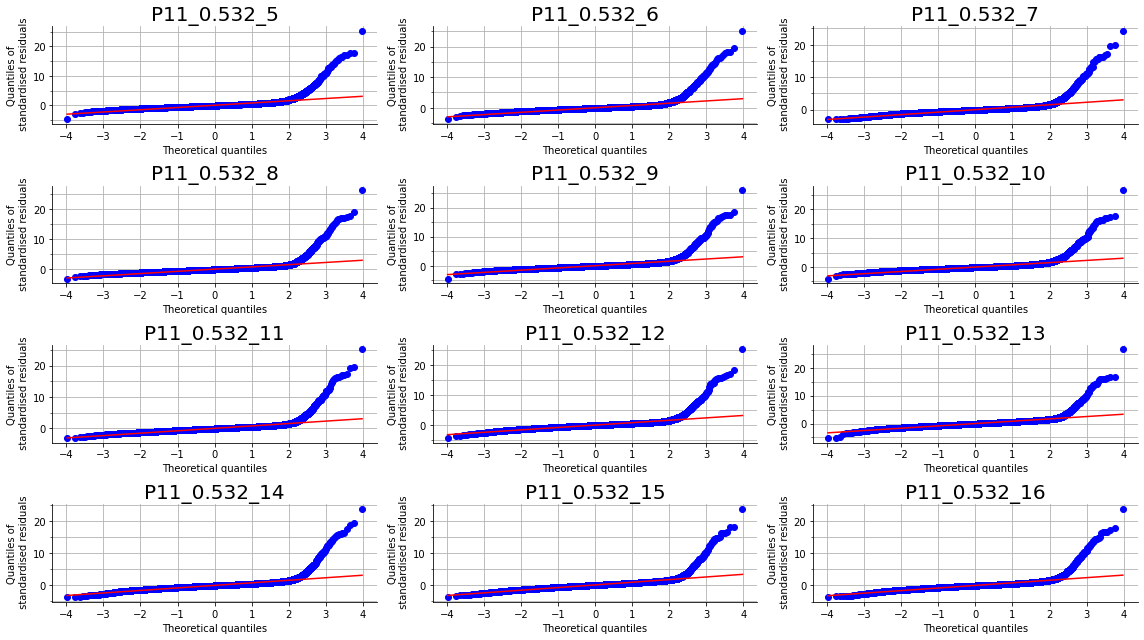

In [46]:
fig, axes= plt.subplots(4, 3, figsize=(16, 9))

for i, col in enumerate(qoi_test.columns[0:12]):
    ax = axes.flatten()[i]
    scipy.stats.probplot(standardise(error_fw[col]), dist="norm", plot=ax);
    ax.set_title(col, fontsize=20)
    ax.set_ylabel('Quantiles of\n standardised residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)
    ax.grid(True, which='minor')
    #ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
#fig.savefig(f'{plot_dir}/forward_residual_normality_plots.jpg')


In [47]:
pd.DataFrame({'Mean': error_fw.mean(axis=0), 'std': error_fw.std(axis=0)})

Mean       std
P11_0.532_5    0.034594  0.165019
P11_0.532_6   -0.004868  0.162764
P11_0.532_7    0.014428  0.164775
P11_0.532_8   -0.010175  0.166806
P11_0.532_9    0.001304  0.155667
...                 ...       ...
P11_0.532_171 -0.025330  0.206787
P11_0.532_172  0.042301  0.221828
P11_0.532_173  0.090518  0.213537
P11_0.532_174 -0.005652  0.231567
P11_0.532_175  0.046902  0.236768

[160 rows x 2 columns]

In [48]:
rel_error_fw.abs().quantile(0.9)

P11_0.532_5      0.994186
P11_0.532_6      0.960361
P11_0.532_7      0.949918
P11_0.532_8      0.972178
P11_0.532_9      0.935511
                   ...   
P11_0.532_171    1.275991
P11_0.532_172    1.319446
P11_0.532_173    1.536293
P11_0.532_174    1.641152
P11_0.532_175    1.601243
Name: 0.9, Length: 160, dtype: float64

In [49]:
statistic_fw, p_fw = scipy.stats.shapiro(standardise(error_fw[qoi_columns[0]]).values)

/psi/home/boiger_r/.local/lib/python3.7/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [50]:
p_fw

0.0

In [50]:
statistic_fw

0.5808316469192505

# Inverse Prediction

## Predict

In [51]:
qoi_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.346368   -15.647405   -15.970624   -16.311292   -16.653436   
1       -16.014276   -16.163742   -16.331920   -16.516203   -16.713155   
2       -15.012475   -15.523168   -16.036147   -16.531054   -16.993892   
3       -15.110576   -15.127886   -15.148264   -15.171547   -15.197773   
4       -15.174501   -15.305256   -15.452063   -15.612544   -15.783912   
...            ...          ...          ...          ...          ...   
19995   -14.684202   -15.030477   -15.398550   -15.783268   -16.160502   
19996   -15.173373   -15.617139   -16.067307   -16.508342   -16.909186   
19997   -15.379258   -15.411835   -15.449856   -15.493067   -15.541145   
19998   -14.784675   -15.078137   -15.392046   -15.719185   -16.045682   
19999   -15.515366   -16.027250   -16.539644   -17.031266   -17.492659   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -16.991183    -17.330672    -17.640897    -17.953306    -18.235696   
1        -16.921192    -17.137610    -17.357178    -17.592391    -17.812220   
2        -17.371364    -17.737432    -18.033515    -18.265816    -18.461357   
3        -15.226795    -15.258587    -15.293043    -15.331595    -15.369561   
4        -15.964517    -16.152045    -16.342427    -16.546712    -16.736172   
...             ...           ...           ...           ...           ...   
19995    -16.518349    -16.876763    -17.199644    -17.509242    -17.786276   
19996    -17.247239    -17.559565    -17.813364    -17.990783    -18.156242   
19997    -15.593900    -15.650971    -15.712164    -15.780053    -15.845553   
19998    -16.366749    -16.678024    -16.959743    -17.213962    -17.454191   
19999    -17.866221    -18.232874    -18.537709    -18.784121    -18.989895   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
0      ...     -23.110124     -23.113011     -23.136928     -23.184647   
1      ...     -23.459839     -23.464077     -23.464821     -23.461755   
2      ...     -22.957258     -22.957445     -22.957538     -22.957538   
3      ...     -20.417253     -20.405321     -20.393602     -20.382090   
4      ...     -22.732734     -22.771907     -22.809611     -22.843529   
...    ...            ...            ...            ...            ...   
19995  ...     -22.322357     -22.292618     -22.286154     -22.309134   
19996  ...     -21.075977     -21.043402     -21.021699     -20.992087   
19997  ...     -21.247042     -21.256490     -21.263280     -21.266821   
19998  ...     -20.218619     -20.143847     -20.075221     -20.011886   
19999  ...     -24.145942     -24.140501     -24.139252     -24.143340   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
0         -23.255981     -23.346580     -23.446105     -23.537277   
1         -23.454866     -23.444477     -23.431206     -23.415891   
2         -22.957445     -22.957258     -22.956978     -22.956511   
3         -20.370920     -20.360152     -20.350048     -20.340592   
4         -22.871158     -22.890708     -22.901070     -22.902218   
...              ...            ...            ...            ...   
19995     -22.364401     -22.451150     -22.561802     -22.678580   
19996     -20.964141     -20.961168     -20.984072     -21.050160   
19997     -21.266735     -21.262851     -21.255332     -21.244681   
19998     -19.957240     -19.912869     -19.875939     -19.841442   
19999     -24.152955     -24.167193     -24.183767     -24.199392   

       P11_0.532_174  P11_0.532_175  
0         -23.598782     -23.614260  
1         -23.399570     -23.383355  
2         -22.956045     -22.955392  
3         -20.332035     -20.324423  
4         -22.895437     -22.882877  
...              ...            ...  
19995     -22.772372     -22.811788  
19996     -21.163198     -21.307003  
19997     -21.231761     -21.217743  
19998     -19.800357     -19.743550  
19999     -24.210446     -24.2143

In [52]:
import time

In [53]:
n_tries = 32
start = time.time()
dvar_pred_iv = surr.sample_n_tries(qoi_test.values, batch_size=128, n_tries=n_tries)
end = time.time()


In [54]:
iv_time = (end-start)/len(qoi_test)
iv_time

0.006399721169471741

In [55]:
all_r2_adj_iv = []

for n_tries in [1, 2, 4, 8, 16, 32]:
    dvar_pred_iv = surr.sample_n_tries(qoi_test.values, batch_size=128, n_tries=n_tries)
    qoi_pred_iv = surr.predict(dvar_pred_iv, batch_size=128)
    qoi_pred_iv = pd.DataFrame(data=qoi_pred_iv, columns=qoi_test.columns)
    
    metric_iv = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

    qoi_pred_plot_iv = qoi_pred_iv.copy()
    r2_adj_iv = metric_iv.call(qoi_test_plot.values, qoi_pred_plot_iv.values).numpy()
    r2_adj_iv = pd.Series(data=r2_adj_iv, index=qoi_test_plot.columns)
    r2_adj_iv = np.round(r2_adj_iv, decimals=2)
    #r2_adj = pd.DataFrame(r2_adj).T.rename(columns=qoi.columns)
    
    r2_adj_iv['n_tries'] = n_tries
    all_r2_adj_iv.append(r2_adj_iv)

all_r2_adj_iv = pd.concat(all_r2_adj_iv, ignore_index=True)

In [74]:
all_r2_adj_iv.min()

0.97

In [56]:
r2_adj_iv = pd.DataFrame(r2_adj_iv).T

In [57]:
dvar_pred_iv_df = pd.DataFrame(dvar_pred_iv,columns = dvar_test.columns)

In [58]:
dvar_test.columns

Index(['n_532nm', 'k_532nm', 'V_tot', 'R_median', 'GSD'], dtype='object')

In [59]:
datapoint = 6000
mu1 = dvar_pred_iv_df.iloc[datapoint]['R_median']
sigma1 = dvar_pred_iv_df.iloc[datapoint]['GSD']
mu2 = dvar_test.iloc[datapoint]['R_median']
sigma2 = dvar_test.iloc[datapoint]['GSD']

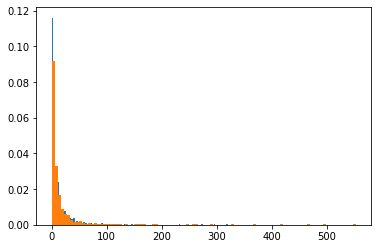

In [60]:

s1 = np.random.lognormal(mu1, sigma1, 1000)
s2 = np.random.lognormal(mu2, sigma2, 1000)


count1, bins1, ignored1 = plt.hist(s1, 100, density=True, align='mid')
count2, bins2, ignored2 = plt.hist(s2, 100, density=True, align='mid')

x1 = np.linspace(min(bins1), max(bins1), 10000)
x2 = np.linspace(min(bins2), max(bins2), 10000)

pdf1 = (np.exp(-(np.log(x1) - mu1)**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
pdf2 = (np.exp(-(np.log(x2) - mu2)**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))


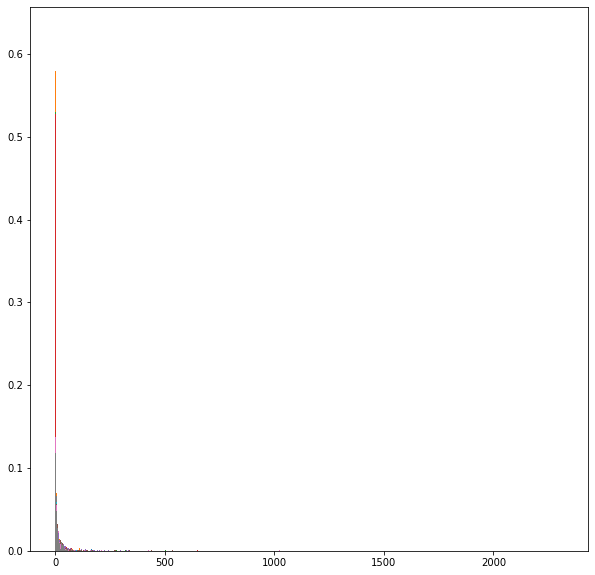

In [61]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]

#presentation_plot_index = [1000,2000,3000,4000,5000,6000,7000]
#presentation_plot_index = [1000,2000,4000,7000]
#presentation_plot_index = [1000,100,200,300,400,500,600,700]
presentation_plot_index = [0,5,6,7,8,9,1000,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv_df.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv_df.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = (np.exp(-(np.log(x1) - mu1)**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = (np.exp(-(np.log(x2) - mu2)**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)



0
5
6
7


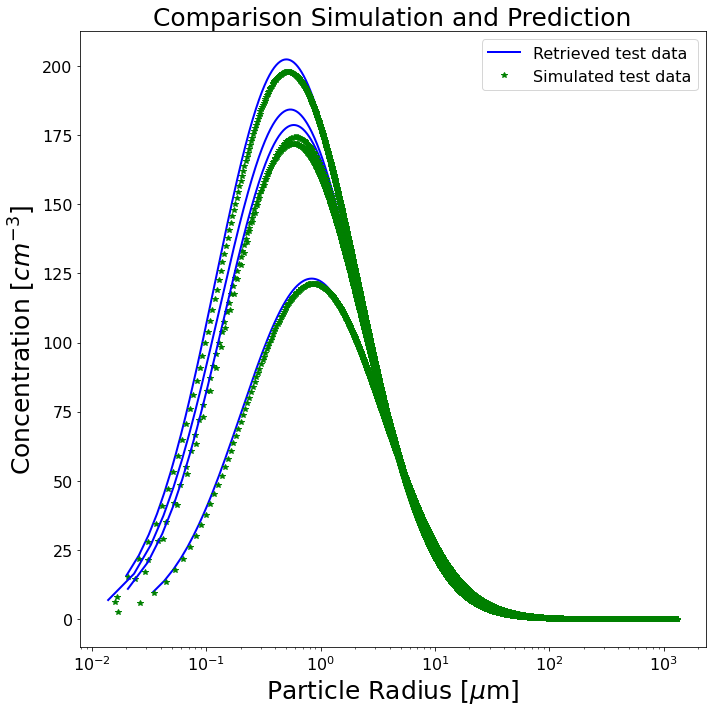

In [62]:
fig, ax = plt.subplots(figsize = (10,10))
#for datalen in range(len(x1data)):
for datalen in (0,1,2,3):
    print(presentation_plot_index[datalen])
    
#datalen = 8  
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1, label = 'Simulated test data')
    else:
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1)#, label = 'Simulated test data')
        
    
ax.legend(['Retrieved test data', 'Simulated test data'], fontsize = 16)
ax.legend(fontsize = 16)   
    #plt.yscale('logit')

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration [$cm^{-3}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')
#ax.get_legend().get_title().set_fontsize('16')

fig.tight_layout() 
fig.savefig(f'{plot_dir}/GSD_GMR_iv.jpg')






#plt.axis('tight')


In [63]:
presentation_plot_index = [1000,100,200,300,400,500,600,700]

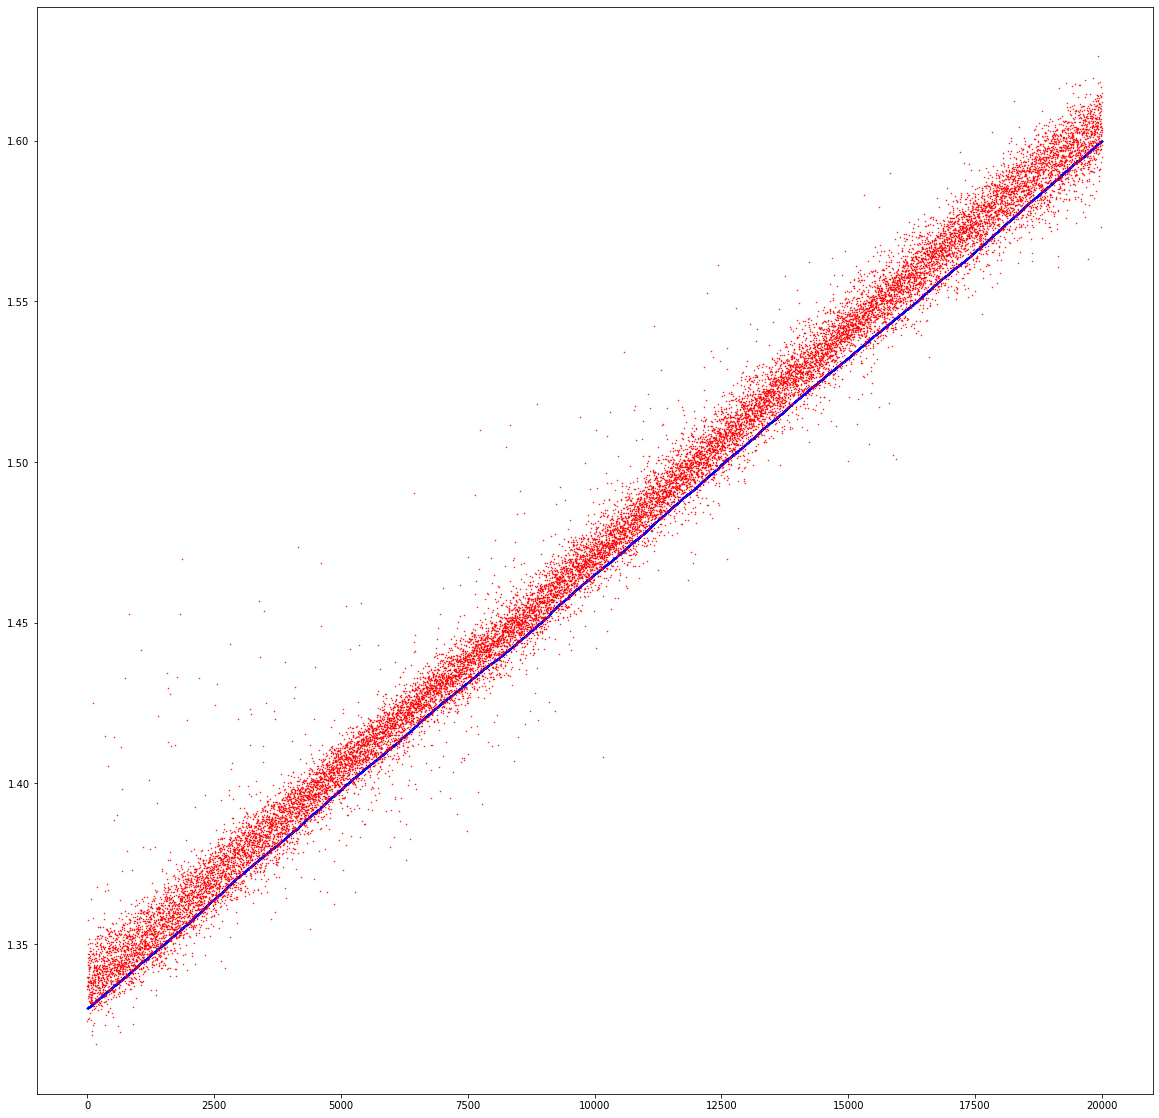

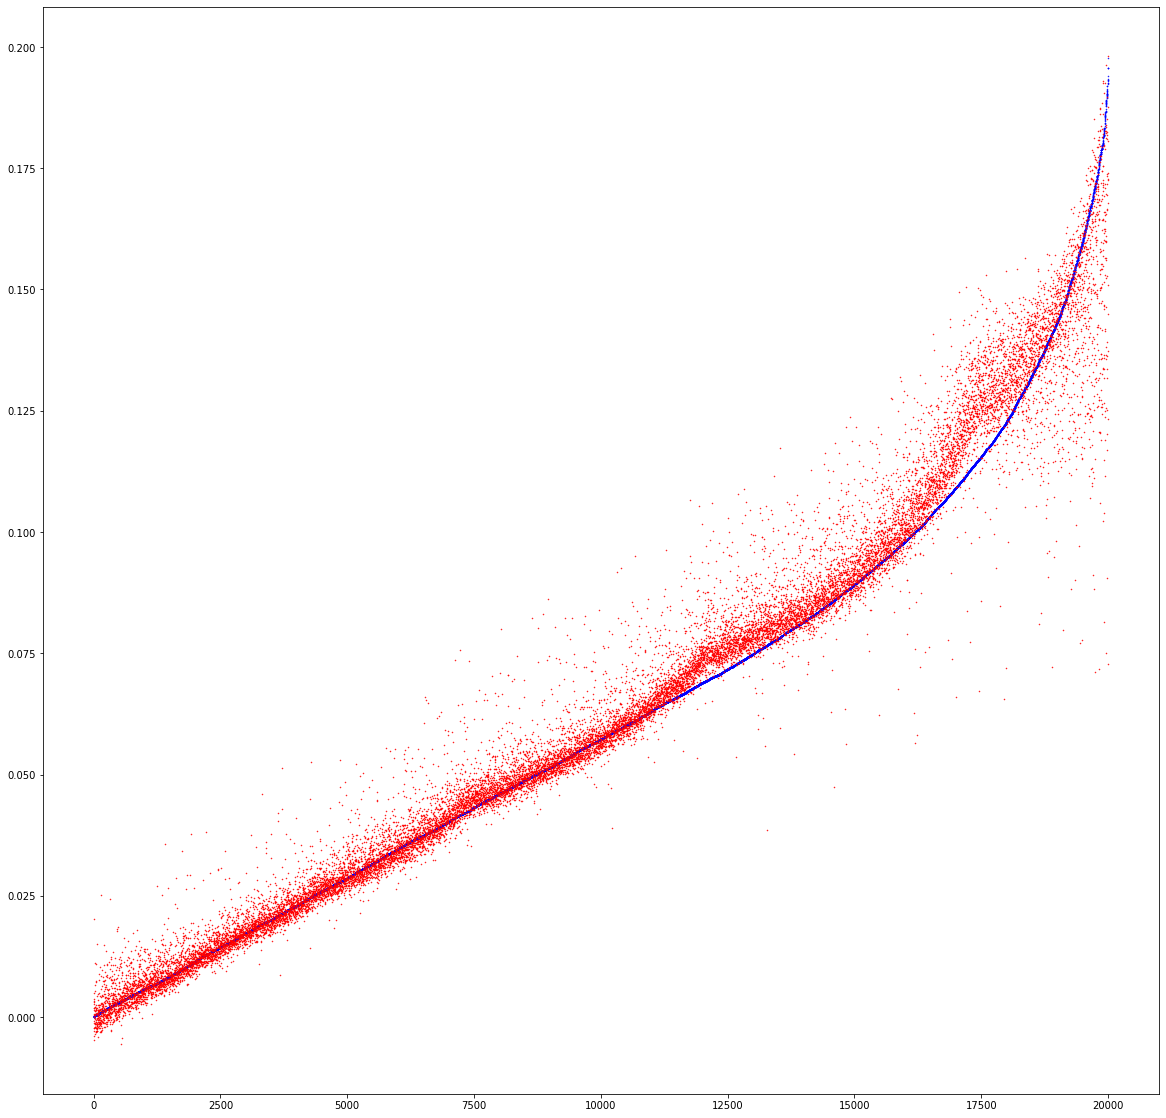

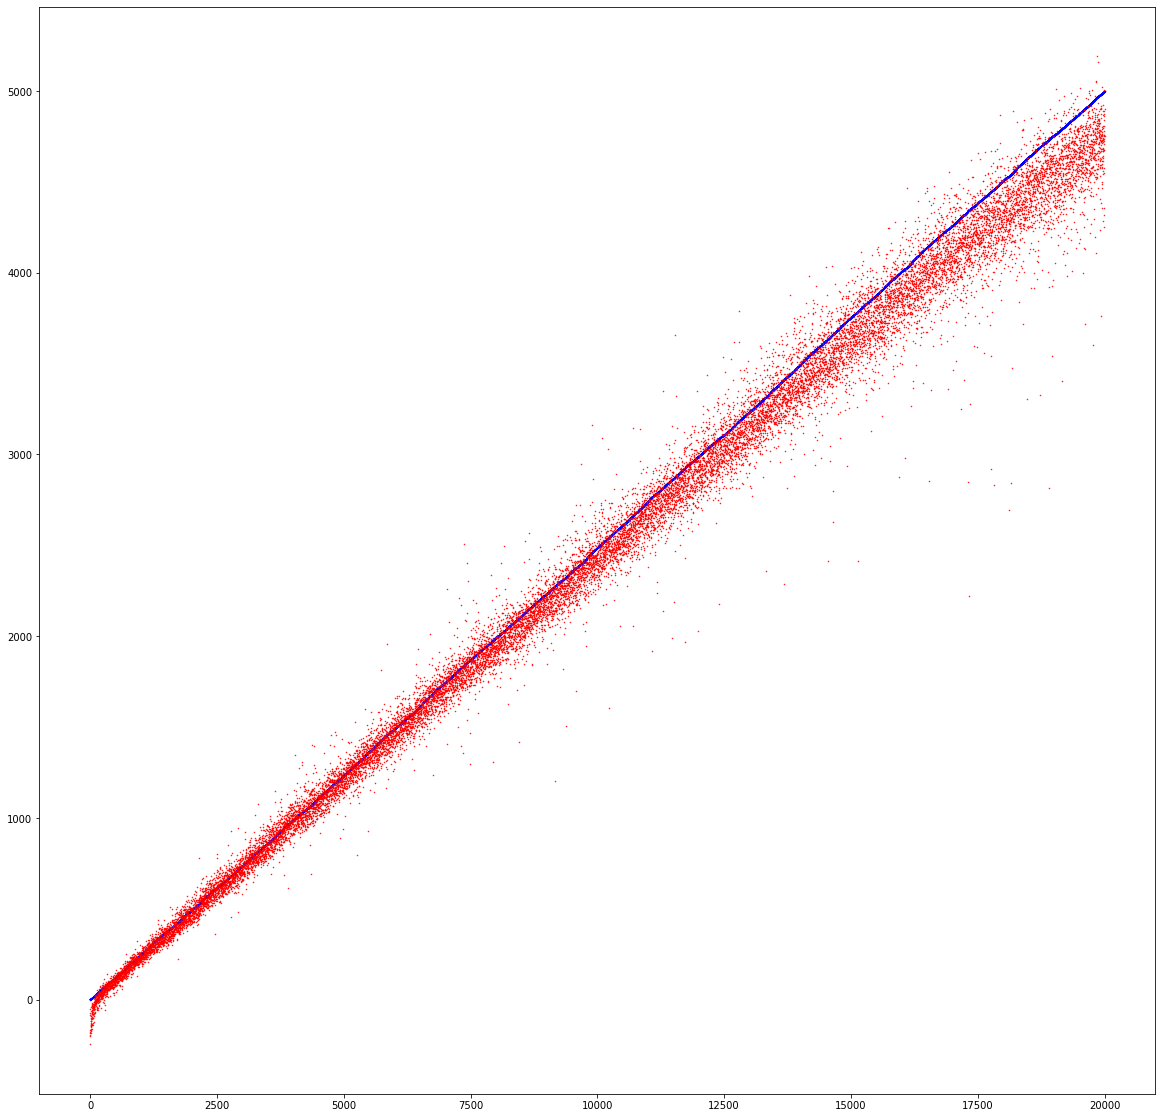

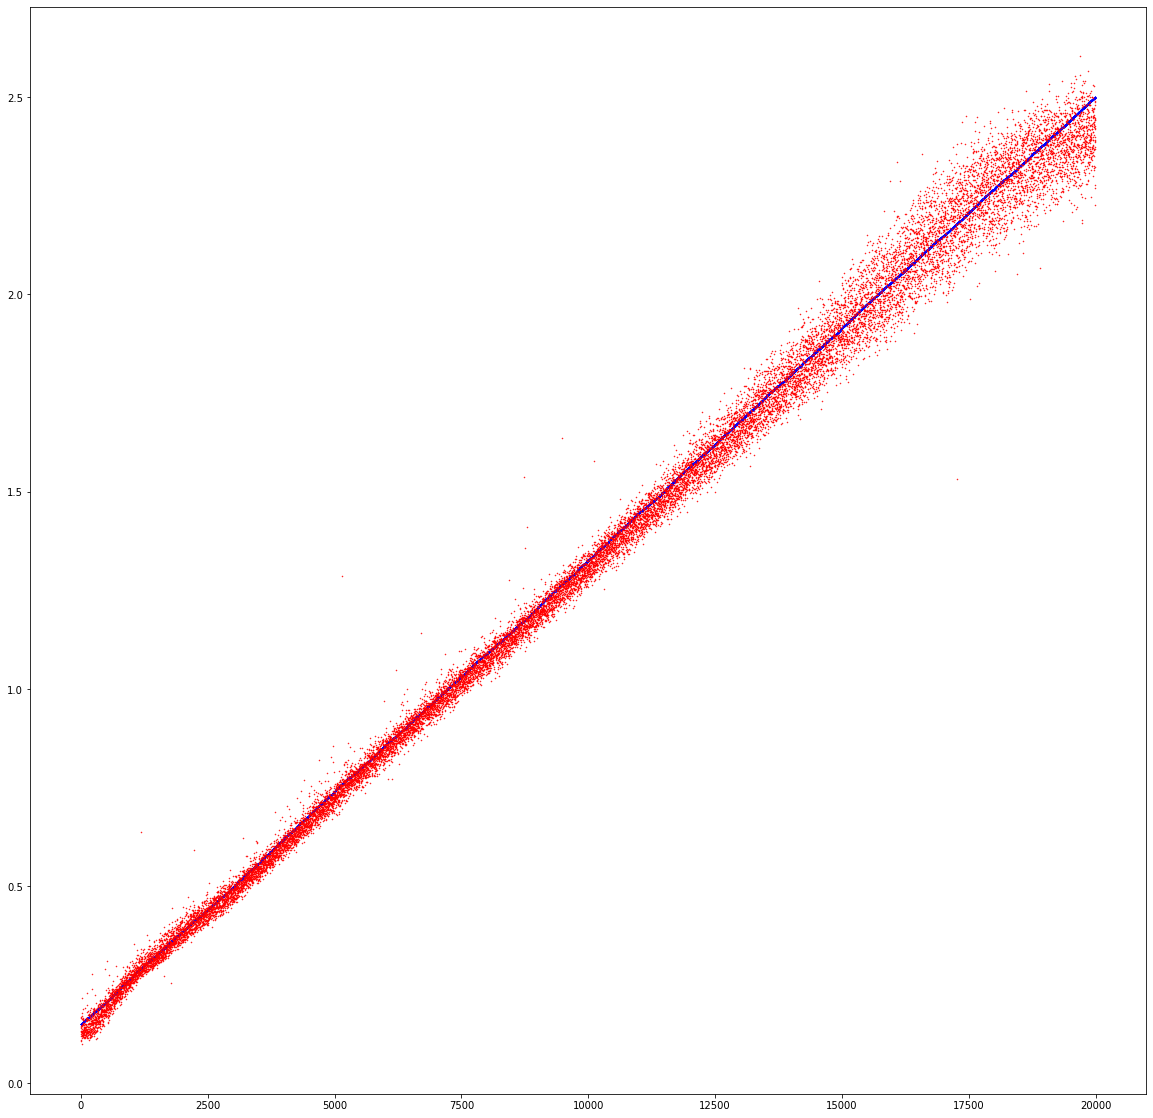

In [64]:
for key in dvar_test.columns:
    dvar_test_help = dvar_test.sort_values(key)
    dvar_pred_iv_df_help = dvar_pred_iv_df.loc[dvar_test_help.index]

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.plot(np.arange(0,len(dvar_test_help)),dvar_test_help[key],'b.', markersize = '1')
    ax.plot(np.arange(0,len(dvar_pred_iv_df_help)),dvar_pred_iv_df_help[key],'r.', markersize = '1')

In [65]:
print(dvar_test.nunique())
print(11*9*1*25*16)
for key in dvar_test.columns:
    print(key,dvar_test[key].unique())

n_532nm     20000
k_532nm     20000
V_tot       20000
R_median    20000
GSD         20000
dtype: int64
39600
n_532nm [1.34515955 1.56091826 1.55675156 ... 1.39025699 1.56361065 1.33838473]
k_532nm [0.06014263 0.17221696 0.17964257 ... 0.04219403 0.01350032 0.09806132]
V_tot [2315.6789112  1121.45045553 4962.55315005 ... 2015.69739665 3989.47590233
 3102.60037372]
R_median [1.36014256 0.87145148 2.03347325 ... 0.38502911 1.35548253 2.07335442]
GSD [1.42202715 1.4221557  1.40548915 ... 1.43090966 1.4096193  1.42655538]


In [66]:
dvar_pred_iv_df

n_532nm   k_532nm        V_tot  R_median       GSD
0      1.347445  0.062810  2235.818129  1.339771  1.424783
1      1.563783  0.169778  1103.856571  0.879085  1.407163
2      1.571221  0.132523  5054.924545  2.126001  1.433843
3      1.341881  0.047255  4447.919375  0.227778  1.409482
4      1.441258  0.125668  2466.797509  0.794637  1.411922
...         ...       ...          ...       ...       ...
19995  1.341956  0.050716  4575.382694  1.486851  1.438117
19996  1.474413  0.012775  3545.061011  1.906677  1.434755
19997  1.404033  0.048223  1971.346613  0.364050  1.434787
19998  1.575284  0.012168  3906.714115  1.365650  1.410322
19999  1.337227  0.100369  3149.030522  2.094746  1.431404

[20000 rows x 5 columns]

In [67]:
presentation_index = [0, 3049]

In [68]:
dvar_test.iloc[presentation_plot_index]

n_532nm   k_532nm        V_tot  R_median       GSD
1000  1.593708  0.044242  1378.618674  0.412567  1.448249
100   1.554328  0.049675   365.801402  0.625081  1.447882
200   1.501669  0.078010  2597.721348  2.351415  1.436077
300   1.482854  0.003746   376.177620  1.500437  1.437492
400   1.562611  0.138917  4024.093493  1.683714  1.426447
500   1.497813  0.126815  2358.568092  2.413961  1.438776
600   1.532540  0.087672  2825.663063  1.755857  1.446044
700   1.400863  0.072802  4593.364934  0.355303  1.410465

In [69]:
dvar_pred_iv_df.iloc[presentation_plot_index]

n_532nm   k_532nm        V_tot  R_median       GSD
1000  1.599007  0.042670  1251.881065  0.383619  1.424131
100   1.563486  0.048842   333.432377  0.595635  1.432602
200   1.511496  0.078331  2426.383630  2.276013  1.417123
300   1.492638  0.004302   395.499787  1.550364  1.433030
400   1.571288  0.141710  3997.242627  1.636074  1.417052
500   1.514436  0.113116  2268.589932  2.380096  1.429967
600   1.539457  0.091839  2743.848828  1.685818  1.416236
700   1.412484  0.091219  4420.254880  0.332817  1.430623

In [70]:
error_dvar = dvar_test - dvar_pred_iv_df
error_dvar

n_532nm   k_532nm       V_tot  R_median       GSD
0     -0.002286 -0.002667   79.860782  0.020371 -0.002756
1     -0.002864  0.002439   17.593884 -0.007634  0.014993
2     -0.014470  0.047119  -92.371395 -0.092528 -0.028354
3     -0.010176 -0.007741  426.372280  0.030370 -0.004557
4     -0.004816 -0.007483   70.174794  0.011863  0.032950
...         ...       ...         ...       ...       ...
19995 -0.008479 -0.003289  189.146833  0.008021 -0.023859
19996 -0.006077  0.000153  -10.868480 -0.071162 -0.029544
19997 -0.013776 -0.006029   44.350784  0.020979 -0.003878
19998 -0.011673  0.001332   82.761788 -0.010168 -0.000703
19999  0.001158 -0.002307  -46.430148 -0.021392 -0.004848

[20000 rows x 5 columns]

In [71]:
plt.plot(dvar_pred_iv_df)

In [72]:
r2_adj_iv_dvar = metric_iv.call(dvar_test.values, dvar_pred_iv_df.values).numpy()
r2_adj_iv_dvar = pd.Series(data=r2_adj_iv_dvar, index=dvar_test.columns)
r2_adj_iv_dvar = np.round(r2_adj_iv_dvar, decimals=2)
    #r2_adj = pd.DataFrame(r2_adj).T.rename(columns=qoi.columns)

r2_adj_iv_dvar

n_532nm     0.98
k_532nm     0.96
V_tot       0.99
R_median    1.00
GSD        -0.37
dtype: float64

In [76]:
rel_error_dvar = (dvar_pred_iv_df - dvar_test) / dvar_test * 100.
rel_error_dvar = pd.DataFrame(rel_error_dvar, columns=dvar_test.columns).abs()
rel_error_dvar

n_532nm    k_532nm     V_tot   R_median       GSD
0      0.169928   4.434631  3.448698   1.497720  0.193810
1      0.183509   1.416020  1.568851   0.875996  1.054222
2      0.929473  26.229501  1.861368   4.550237  2.017381
3      0.764118  19.590511  8.747369  11.764749  0.324326
4      0.335270   6.331383  2.766084   1.470907  2.280481
...         ...        ...       ...        ...       ...
19995  0.635838   6.935405  3.969895   0.536576  1.686999
19996  0.413847   1.182909  0.307524   3.876951  2.102468
19997  0.990929  14.288241  2.200270   5.448623  0.270982
19998  0.746550   9.869481  2.074503   0.750117  0.049858
19999  0.086529   2.352886  1.496491   1.031749  0.339854

[20000 rows x 5 columns]

In [77]:
rel_error_table_dvar = np.round(rel_error_dvar.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_dvar

n_532nm  k_532nm  V_tot  R_median   GSD
50%     0.50     5.17   3.68      2.14  0.85
75%     0.73    10.75   6.18      3.70  1.45
90%     0.99    23.03   9.67      5.63  1.97
95%     1.17    40.75  13.93      7.26  2.22
99%     1.81   197.21  58.04     17.63  2.55

In [76]:
rel_error_dvar.max()

n_532nm        9.017330
k_532nm     5771.636133
V_tot       8017.596114
R_median     113.514850
GSD            3.087294
dtype: float64

## Calculate metrics

In [77]:
all_r2_adj_iv

0       0.97
1       0.97
2       0.97
3       0.98
4       0.98
       ...  
961     0.99
962     0.99
963     0.99
964     0.99
965    32.00
Length: 966, dtype: float64

In [78]:
r2_adj_iv

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.99         0.99         0.99         0.99         0.99   

   P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  ...  \
0          0.99          0.99          0.99          0.99           1.0  ...   

   P11_0.532_167  P11_0.532_168  P11_0.532_169  P11_0.532_170  P11_0.532_171  \
0           0.99           0.99           0.99           0.99           0.99   

   P11_0.532_172  P11_0.532_173  P11_0.532_174  P11_0.532_175  n_tries  
0           0.99           0.99           0.99           0.99     32.0  

[1 rows x 161 columns]

In [79]:
error_iv = qoi_pred_plot_iv - qoi_test_plot

In [80]:
rel_error_iv = (qoi_pred_plot_iv - qoi_test_plot) / qoi_test_plot * 100.
rel_error_iv = pd.DataFrame(rel_error_iv, columns=qoi_test_plot.columns).abs()

In [81]:
rel_error_table_iv = np.round(rel_error_iv.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)

In [82]:
rel_error_table_iv

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
50%         0.27         0.33         0.34         0.33         0.33   
75%         0.47         0.57         0.60         0.56         0.60   
90%         0.73         0.84         0.92         0.83         0.93   
95%         0.94         1.08         1.17         1.04         1.18   
99%         1.67         1.89         1.92         1.73         1.81   

     P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
50%          0.34          0.33          0.38          0.38          0.35   
75%          0.61          0.58          0.67          0.65          0.61   
90%          0.91          0.90          0.99          0.97          0.93   
95%          1.11          1.14          1.22          1.20          1.19   
99%          1.59          1.73          1.85          1.74          1.90   

     ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
50%  ...           0.35           0.34           0.34           0.50   
75%  ...           0.61           0.60           0.61           0.82   
90%  ...           0.93           0.90           0.96           1.16   
95%  ...           1.17           1.11           1.21           1.42   
99%  ...           1.87           1.61           1.85           2.05   

     P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
50%           0.41           0.42           0.44           0.50   
75%           0.73           0.75           0.77           0.91   
90%           1.14           1.20           1.22           1.41   
95%           1.46           1.57           1.55           1.74   
99%           2.23           2.41           2.39           2.46   

     P11_0.532_174  P11_0.532_175  
50%           0.51           0.55  
75%           0.92           1.02  
90%           1.41           1.61  
95%           1.77           2.01  
99%           2.62           2.87  

[5 rows x 160 columns]

In [83]:
rel_error_table_iv.max(axis = 1)

50%    0.55
75%    1.02
90%    1.61
95%    2.01
99%    2.87
dtype: float64

## Save $\bar{R}^2$

In [84]:
#r2_adj.to_latex(f'{plot_dir}/isodar_sampling_pred_r2_table.tex', index=False, escape=False)

## Plot

In [85]:


r2_adj_iv_T = r2_adj_iv.T
r2_adj_iv_T=r2_adj_iv_T.rename(columns={0: "r2_adj"})
r2_adj_iv_T

r2_adj
P11_0.532_5      0.99
P11_0.532_6      0.99
P11_0.532_7      0.99
P11_0.532_8      0.99
P11_0.532_9      0.99
...               ...
P11_0.532_172    0.99
P11_0.532_173    0.99
P11_0.532_174    0.99
P11_0.532_175    0.99
n_tries         32.00

[161 rows x 1 columns]

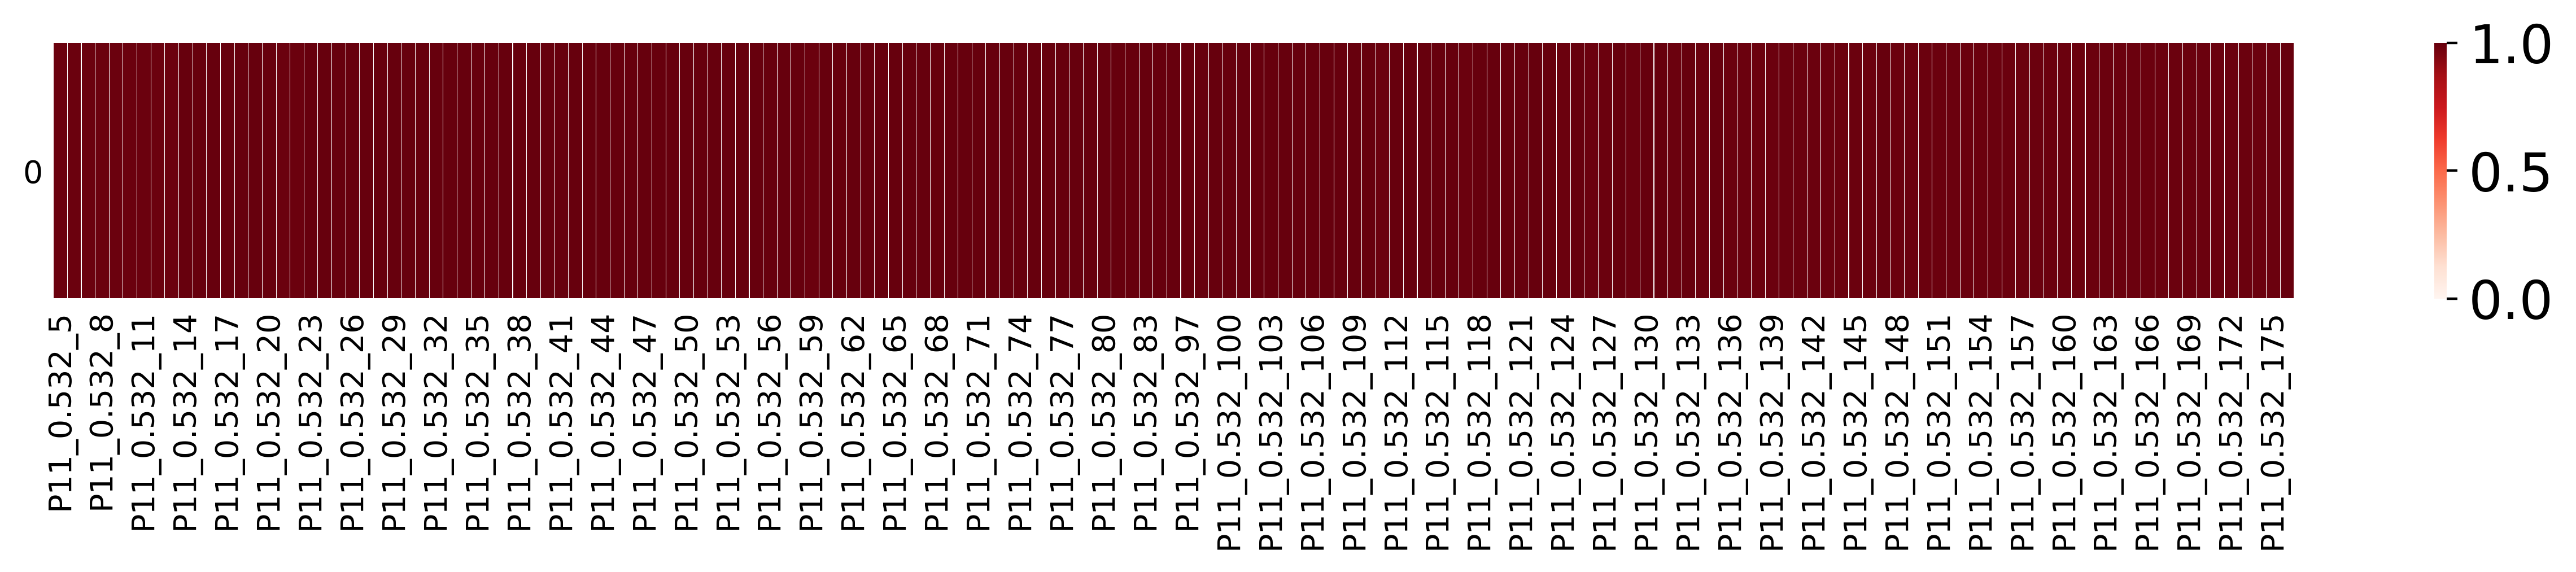

In [86]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_model_inv_r2_adj.jpg')


### Relative Errors

In [87]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
      #      annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_sampling_rel_error_percentiles.jpg')


In [101]:
max(rel_error_table_iv.max())

2.87

### DVARs vs. percentage errors

In [89]:
def plot_error_vs_dvar(design_var):
    fig, axes = plt.subplots(4, 3, figsize=(16, 27))


    for i, col in enumerate(qoi_test_plot.columns[0:12]):
        ax = axes.flatten()[i]

        ax.plot(dvar_test[design_var],
                rel_error_iv[col],
                'o');

        ax.hlines(y=0.,
                  xmin=dvar_test[design_var].min(),
                  xmax=dvar_test[design_var].max(),
                  color='red',
                  zorder=3)

        ax.set_xlabel(design_var, fontsize=20)
        ax.set_ylabel(r'$\Delta$' + col + r' [%]', fontsize=20)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        

    fig.tight_layout()
    fig.savefig(f'{plot_dir}/sampling_percentage_error_vs_{design_var}.jpg')
    
    return fig

In [90]:
#for d in dvar.columns:
#    plot_error_vs_dvar(d)

### Correlations between DVARs and QOIs

In [91]:
combined_iv = pd.concat([dvar_test, rel_error_iv], axis=1)

In [92]:
corr_iv = np.round(combined_iv.corr(), decimals=2)

In [93]:
to_plot_iv = corr_iv.copy()
to_plot_iv.drop(columns=dvar_test.columns, inplace=True)
to_plot_iv.drop(index=qoi_test.columns, inplace=True)

In [94]:
to_plot_iv

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
n_532nm          0.02        -0.02        -0.03         0.01         0.07   
k_532nm         -0.03        -0.04        -0.07        -0.05        -0.13   
V_tot           -0.14        -0.14        -0.08        -0.16        -0.04   
R_median        -0.25        -0.23        -0.19        -0.14        -0.16   
GSD              0.02        -0.01        -0.02        -0.01         0.01   

          P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  \
n_532nm           0.19          0.03          0.09          0.02   
k_532nm          -0.19         -0.11         -0.16         -0.20   
V_tot            -0.06         -0.03         -0.04         -0.01   
R_median         -0.09         -0.16         -0.10         -0.08   
GSD               0.04         -0.00          0.03          0.01   

          P11_0.532_14  ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  \
n_532nm          -0.06  ...          -0.02          -0.00           0.05   
k_532nm          -0.11  ...          -0.15          -0.15          -0.13   
V_tot            -0.04  ...          -0.04          -0.08          -0.09   
R_median         -0.23  ...          -0.05          -0.11          -0.21   
GSD              -0.02  ...          -0.01          -0.00           0.01   

          P11_0.532_169  P11_0.532_170  P11_0.532_171  P11_0.532_172  \
n_532nm           -0.06          -0.01          -0.01          -0.07   
k_532nm           -0.14          -0.11          -0.13          -0.18   
V_tot             -0.06          -0.03          -0.04          -0.06   
R_median          -0.09          -0.18          -0.26          -0.18   
GSD               -0.01          -0.00           0.01           0.00   

          P11_0.532_173  P11_0.532_174  P11_0.532_175  
n_532nm           -0.08          -0.02          -0.09  
k_532nm           -0.28          -0.18          -0.25  
V_tot             -0.01          -0.08           0.01  
R_median          -0.21          -0.22          -0.25  
GSD               -0.01          -0.01          -0.01  

[5 rows x 160 columns]

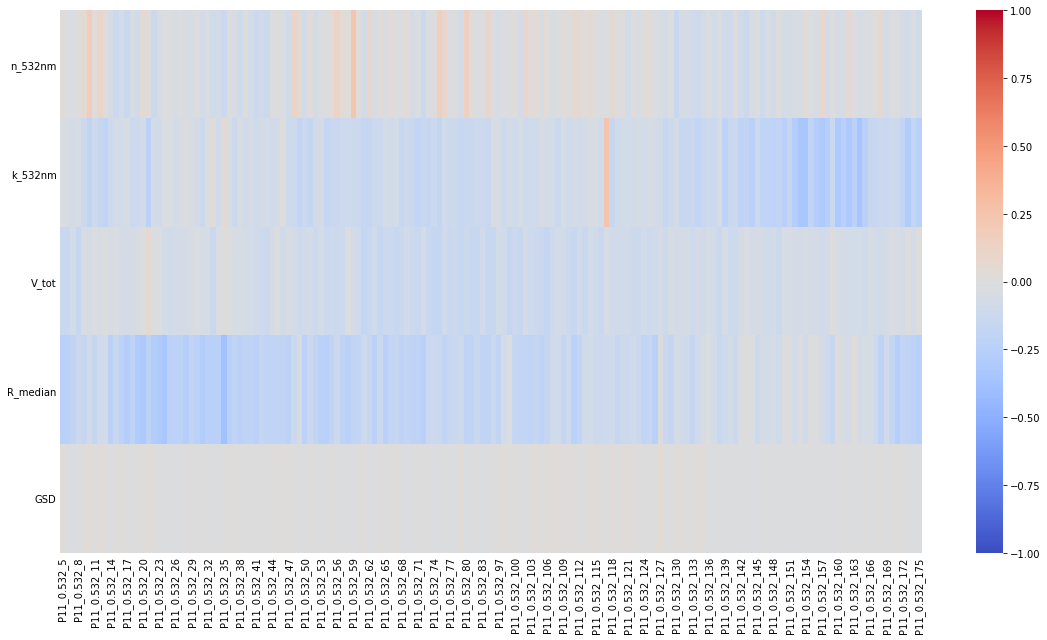

In [95]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.heatmap(to_plot_iv,
            vmin=-1.,
            vmax=1.,
            cmap='coolwarm',
#            annot=True,
            ax=ax)
ax.tick_params(axis='y', rotation=0)
ax.tick_params(axis='both', length=0, labelsize=10)

fig.tight_layout()
fig.savefig(f'{plot_dir}/sampling_rel_error_correlations.jpg')

### Residuals

colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))

for col in ['phase_4.0', 'phase_5.0', 'phase_6.0']:
    sns.distplot(error_iv[col], ax=ax)

ax.text(x=0.3,
        y=0.1,
        color=colors[0],
        s=r'$phase 4.0$',
        fontsize=30)
ax.text(x=0.3,
        y=1.,
        color=colors[1],
        s=r'$phase 5.0$',
        fontsize=30)
ax.text(x=0.3,
        y=2,
        color=colors[2],
        s=r'$phase 6.0$',
        fontsize=30)

ax.set_xlabel('Residuals [mm]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

#fig.savefig(f'{plot_dir}/sampling_residual_distr_sigma.jpg')

colors = sns.color_palette()

fig, ax = plt.subplots(figsize=(16, 9))

for col in qoi_test.columns:
    sns.distplot(error_iv[col], ax=ax)



ax.set_xlabel('Residuals [mm mrad]', fontsize=25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(labelsize=18)

fig.savefig(f'{plot_dir}/forward_residual_distr_epsilon.jpg')

In [96]:
def standardise(x):
    return (x - x.mean()) / x.std()

In [97]:

fig, axes= plt.subplots(4, 3, figsize=(16, 9))

for i, col in enumerate(qoi_test.columns[0:12]):
    ax = axes.flatten()[i]
    scipy.stats.probplot(standardise(error_iv[col]), dist="norm", plot=ax);
#    ax.set_title(qoi_labels[col], fontsize=20)
    ax.set_ylabel('Quantiles of\n standardised residuals')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)
    ax.grid(True, which='minor')
    #ax.set_yticks([-3, -2, -1, 0, 1, 2, 3])
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

fig.tight_layout()
fig.savefig(f'{plot_dir}/sampling_residual_normality_plots.jpg')

In [98]:
pd.DataFrame({'Mean': error_iv.mean(axis=0), 'std': error_iv.std(axis=0)})

Mean       std
P11_0.532_5   -0.005476  0.090288
P11_0.532_6   -0.034603  0.095640
P11_0.532_7   -0.024250  0.104849
P11_0.532_8   -0.028348  0.098680
P11_0.532_9   -0.024085  0.107301
...                 ...       ...
P11_0.532_171 -0.003597  0.172871
P11_0.532_172  0.006315  0.169727
P11_0.532_173  0.035233  0.185705
P11_0.532_174 -0.034837  0.192274
P11_0.532_175  0.030279  0.210140

[160 rows x 2 columns]

In [99]:
rel_error_iv.abs().quantile(0.9)

P11_0.532_5      0.728451
P11_0.532_6      0.842018
P11_0.532_7      0.918973
P11_0.532_8      0.832803
P11_0.532_9      0.929142
                   ...   
P11_0.532_171    1.202464
P11_0.532_172    1.219819
P11_0.532_173    1.411641
P11_0.532_174    1.410376
P11_0.532_175    1.606460
Name: 0.9, Length: 160, dtype: float64

In [100]:
statistic_iv, p_iv = scipy.stats.shapiro(standardise(error_iv.columns[0]).values)

AttributeError: 'str' object has no attribute 'mean'

In [ ]:
p_iv

In [ ]:
statistic_iv

In [ ]:
surr.model.summary()

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
plot_model(surr.model, show_shapes=False,show_layer_names=True,to_file = f'{plot_dir}/model_architecture_invertible.png')


In [ ]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]
#presentation_plot_index =[10,11,12,13,14,15,16]
#presentation_plot_index =[40,41,42,43,44,45,46,47,48,49,50]
#presentation_plot_index = [70,18,30,46,59,65]
presentation_plot_index = [0,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(qoi_test.columns)),qoi_test.iloc[index],'b*')
    ax.plot(np.arange(0,len(qoi_pred_iv.columns)),qoi_pred_iv.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Test data', 'Predicted test data'], fontsize = 16)
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

In [ ]:
presentation_plot_index = [0,1,3,4,5,6,7,8,9]
#presentation_plot_index =[10,11,12,13,14,15,16]
#presentation_plot_index =[40,41,42,43,44,45,46,47,48,49,50]
presentation_plot_index = [0,5000,6000]
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(qoi_test.columns)),qoi_test.iloc[index],'b*')
    ax.plot(np.arange(0,len(qoi_pred_fw.columns)),qoi_pred_fw.iloc[index],'r.')
    
    #plt.yscale('logit')

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
ax.legend(['Test data', 'Predicted test data'], fontsize = 16)
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data__result_fw.jpg')

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    
    ax.plot(qoi_pred_iv.iloc[index],qoi_test.iloc[index],'b*')
    
    #plt.yscale('logit')

ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 


ax.axline([-23, -23], [-7.4, -7.4])
#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation_iv.jpg')

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(qoi_pred_fw.iloc[index],qoi_test.iloc[index],'b*')
    
    #plt.yscale('logit')

ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 


ax.axline([-23, -23], [-7.4, -7.4])
#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation_fw.jpg')

In [ ]:
r2_adj_fw = r2_adj_fw.rename({0: 'r2_adj'}, axis='index')
r2_adj_iv = r2_adj_iv.rename({0: 'r2_adj'}, axis='index')


# create overview plot

In [ ]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
sns.heatmap(to_plot_fw,
            vmin=-1.,
            vmax=1.,
            linewidths = 0.01,
            cmap='coolwarm',)
plt.tick_params(labelsize = 16)
plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_fw.columns)+3),qoi_pred_fw.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_fw.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_fw.jpg')



In [ ]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
sns.heatmap(to_plot_iv,
            vmin=-1.,
            vmax=1.,
            linewidths = 0.01,
            cmap='coolwarm',)
plt.tick_params(labelsize = 16)
plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_iv.columns)+3),qoi_pred_iv.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_iv.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_iv.jpg')



In [ ]:
n_width = 2
n_depth = 4.5
nominal_dim = 16.5

In [ ]:
coefficient_network_units=[n_width for i in range(n_depth)] + [nominal_dim // 2],

In [ ]:
[nominal_dim // 2]

In [ ]:
[n_width for i in range(n_depth)]


In [ ]:
[n_width for i in range(n_depth)]+ [nominal_dim // 2]